In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

dobryanka ru
pingliang cn
barrow us
rikitea pf
pisco pe
vaini to
east london za
fairbanks us
hermanus za
illoqqortoormiut gl
georgetown sh
saint-philippe re
mar del plata ar
barrow us
samusu ws
ilulissat gl
pangnirtung ca
katsuura jp
vila vu
avarua ck
sitka us
visalia us
upernavik gl
safaga eg
samusu ws
ilulissat gl
kavieng pg
hilo us
barentsburg sj
chuy uy
mutsamudu km
chapais ca
illoqqortoormiut gl
avarua ck
port alfred za
santa isabel do rio negro br
albany au
burica pa
punta arenas cl
lebu cl
rikitea pf
samana do
cherskiy ru
rikitea pf
atuona pf
butaritari ki
belushya guba ru
busselton au
port-gentil ga
hermanus za
oranjestad aw
roald no
vestmannaeyjar is
mataura pf
clyde river ca
nizhneyansk ru
dikson ru
kangaatsiaq gl
bandarbeyla so
mataura pf
airai pw
hithadhoo mv
nikolskoye ru
pisco pe
oktyabrskoye ru
hilo us
tuatapere nz
ushuaia ar
thompson ca
abbeville fr
pucara pe
buraydah sa
vila velha br
busselton au
marcona pe
vardo no
mahebourg mu
east london za
grand baie mu
vaitupu wf


longyearbyen sj
road town vg
bethel us
carlos chagas br
hermanus za
taolanaro mg
qaanaaq gl
port lincoln au
taolanaro mg
fukue jp
qostanay kz
haines junction ca
vaini to
gazni af
illoqqortoormiut gl
taltal cl
sentyabrskiy ru
goure ne
busselton au
porto novo cv
luderitz na
albany au
butaritari ki
awbari ly
andenes no
port elizabeth za
torbay ca
taolanaro mg
rikitea pf
illoqqortoormiut gl
yumen cn
zadar hr
rikitea pf
filingue ne
high level ca
punta arenas cl
puerto ayora ec
castro cl
thompson ca
mogadishu so
bengkulu id
atuona pf
taolanaro mg
chuy uy
lorengau pg
the valley ai
chicama pe
mocambique mz
cape town za
yellowknife ca
rikitea pf
butaritari ki
busselton au
bambous virieux mu
tasiilaq gl
rikitea pf
hervey bay au
attawapiskat ca
san cristobal ec
esperance au
haines junction ca
esmeraldas ec
fallon us
luderitz na
busselton au
taolanaro mg
butaritari ki
hofn is
kapaa us
ushuaia ar
cape town za
arraial do cabo br
touros br
tasiilaq gl
qaanaaq gl
port alfred za
clyde river ca
fort smi

bredasdorp za
puerto ayora ec
bluff nz
hobart au
bredasdorp za
presidencia roque saenz pena ar
busselton au
hithadhoo mv
bud no
busselton au
khilok ru
grand river south east mu
cidreira br
lekoni ga
san juan ar
tvoroyri fo
hovd mn
longyearbyen sj
vaitupu wf
punta arenas cl
avarua ck
norman wells ca
warqla dz
longyearbyen sj
amderma ru
padang id
kodiak us
dubbo au
englewood us
slave lake ca
howard springs au
yar-sale ru
rikitea pf
severo-kurilsk ru
flinders au
lorengau pg
kaputa zm
ushuaia ar
talnakh ru
alta floresta br
eureka us
rikitea pf
puerto ayora ec
kodiak us
labuan my
palmer us
bethel us
tumannyy ru
east london za
port elizabeth za
punta arenas cl
san andres co
mataura pf
manokwari id
cape town za
barrow us
vaitupu wf
mataura pf
antalaha mg
turayf sa
miraflores co
kohima in
muzhi ru
san quintin mx
mataura pf
itaituba br
port elizabeth za
busselton au
ushuaia ar
martos es
sao geraldo do araguaia br
bredasdorp za
chase ca
marcona pe
avarua ck
belushya guba ru
port alfred za
cape t

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dobryanka
Processing Record 2 of Set 1 | pingliang
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | fairbanks
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | pangnirtung
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | vila
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | visalia
Processing Record 22 o

Processing Record 34 of Set 4 | fortuna
Processing Record 35 of Set 4 | itarema
Processing Record 36 of Set 4 | sur
Processing Record 37 of Set 4 | saint-denis
Processing Record 38 of Set 4 | bathsheba
Processing Record 39 of Set 4 | novo aripuana
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | hamilton
Processing Record 42 of Set 4 | adrar
Processing Record 43 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 44 of Set 4 | luderitz
Processing Record 45 of Set 4 | wlodawa
Processing Record 46 of Set 4 | yulara
Processing Record 47 of Set 4 | baykit
Processing Record 48 of Set 4 | westport
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | manjacaze
Processing Record 2 of Set 5 | ayagoz
Processing Record 3 of Set 5 | muravlenko
Processing Record 4 of Set 5 | zheleznodorozhnyy
Processing Record 5 of Set 5 | san rafael
Processing Record 6 of Set 5 | tumanny

Processing Record 20 of Set 8 | chiredzi
Processing Record 21 of Set 8 | verkhniy baskunchak
Processing Record 22 of Set 8 | mandera
Processing Record 23 of Set 8 | san quintin
Processing Record 24 of Set 8 | homer
Processing Record 25 of Set 8 | phaltan
Processing Record 26 of Set 8 | xuddur
Processing Record 27 of Set 8 | lolua
City not found. Skipping...
Processing Record 28 of Set 8 | acari
Processing Record 29 of Set 8 | sioux lookout
Processing Record 30 of Set 8 | qingdao
Processing Record 31 of Set 8 | belmonte
Processing Record 32 of Set 8 | minab
Processing Record 33 of Set 8 | samarai
Processing Record 34 of Set 8 | moron
Processing Record 35 of Set 8 | vaureal
Processing Record 36 of Set 8 | pachino
Processing Record 37 of Set 8 | orchard homes
Processing Record 38 of Set 8 | tonj
Processing Record 39 of Set 8 | jalu
Processing Record 40 of Set 8 | xiongzhou
Processing Record 41 of Set 8 | buala
Processing Record 42 of Set 8 | ankazobe
Processing Record 43 of Set 8 | birsk


Processing Record 8 of Set 12 | slave lake
Processing Record 9 of Set 12 | howard springs
Processing Record 10 of Set 12 | yar-sale
Processing Record 11 of Set 12 | flinders
Processing Record 12 of Set 12 | kaputa
Processing Record 13 of Set 12 | alta floresta
Processing Record 14 of Set 12 | eureka
Processing Record 15 of Set 12 | labuan
Processing Record 16 of Set 12 | palmer
Processing Record 17 of Set 12 | antalaha
Processing Record 18 of Set 12 | turayf
Processing Record 19 of Set 12 | miraflores
Processing Record 20 of Set 12 | kohima
Processing Record 21 of Set 12 | muzhi
Processing Record 22 of Set 12 | martos
Processing Record 23 of Set 12 | sao geraldo do araguaia
Processing Record 24 of Set 12 | chase
Processing Record 25 of Set 12 | gangotri
City not found. Skipping...
Processing Record 26 of Set 12 | middleton
Processing Record 27 of Set 12 | sao joao da barra
Processing Record 28 of Set 12 | sheksna
Processing Record 29 of Set 12 | la ligua
Processing Record 30 of Set 12 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dobryanka,58.4619,56.4165,15.66,94,100,7.49,RU,2022-02-11 20:23:06
1,Pingliang,35.5392,106.6861,26.13,97,100,4.94,CN,2022-02-11 20:23:07
2,Barrow,71.2906,-156.7887,-27.38,68,100,6.91,US,2022-02-11 20:20:18
3,Rikitea,-23.1203,-134.9692,79.03,73,4,16.28,PF,2022-02-11 20:23:08
4,Pisco,-13.7000,-76.2167,82.45,51,0,19.57,PE,2022-02-11 20:23:08
5,Vaini,-21.2000,-175.2000,82.56,89,20,6.91,TO,2022-02-11 20:23:08
6,East London,-33.0153,27.9116,74.66,85,100,6.15,ZA,2022-02-11 20:23:09
7,Fairbanks,64.8378,-147.7164,1.36,75,100,9.22,US,2022-02-11 20:23:09
8,Hermanus,-34.4187,19.2345,66.90,88,0,5.57,ZA,2022-02-11 20:23:09
9,Georgetown,5.4112,100.3354,78.89,86,20,4.61,MY,2022-02-11 20:23:10


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [17]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dobryanka,RU,2022-02-11 20:23:06,58.4619,56.4165,15.66,94,100,7.49
1,Pingliang,CN,2022-02-11 20:23:07,35.5392,106.6861,26.13,97,100,4.94
2,Barrow,US,2022-02-11 20:20:18,71.2906,-156.7887,-27.38,68,100,6.91
3,Rikitea,PF,2022-02-11 20:23:08,-23.1203,-134.9692,79.03,73,4,16.28
4,Pisco,PE,2022-02-11 20:23:08,-13.7000,-76.2167,82.45,51,0,19.57
5,Vaini,TO,2022-02-11 20:23:08,-21.2000,-175.2000,82.56,89,20,6.91
6,East London,ZA,2022-02-11 20:23:09,-33.0153,27.9116,74.66,85,100,6.15
7,Fairbanks,US,2022-02-11 20:23:09,64.8378,-147.7164,1.36,75,100,9.22
8,Hermanus,ZA,2022-02-11 20:23:09,-34.4187,19.2345,66.90,88,0,5.57
9,Georgetown,MY,2022-02-11 20:23:10,5.4112,100.3354,78.89,86,20,4.61


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

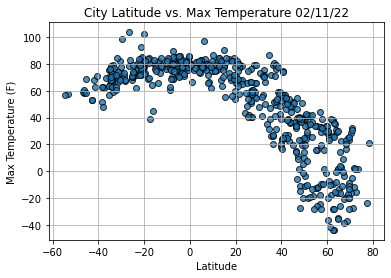

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

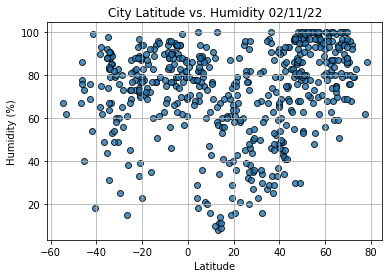

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

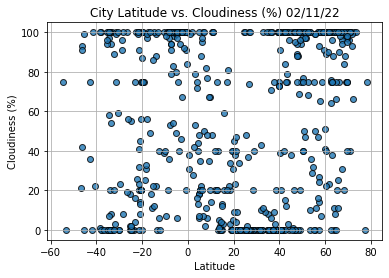

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

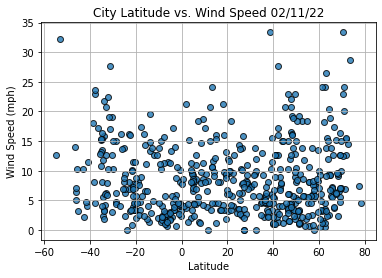

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

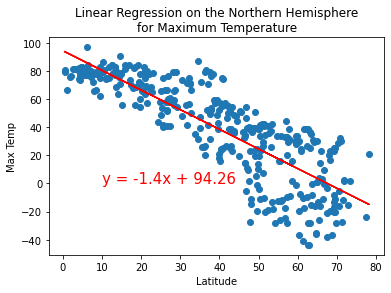

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,0))

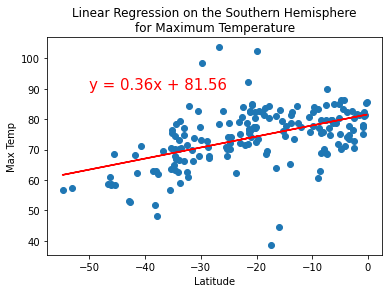

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

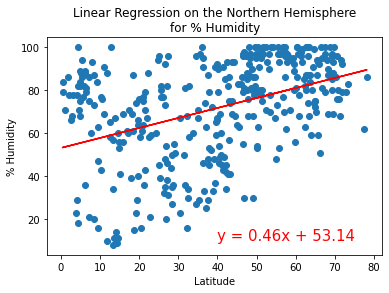

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

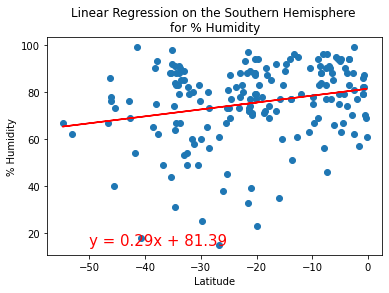

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

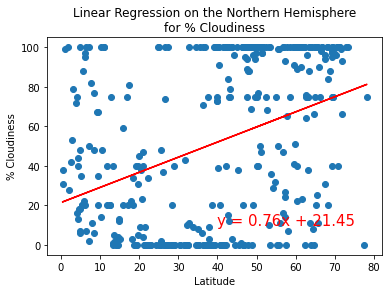

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(40,10))

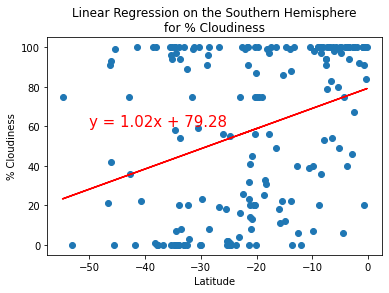

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

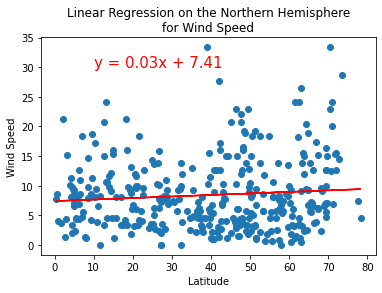

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(10,30))

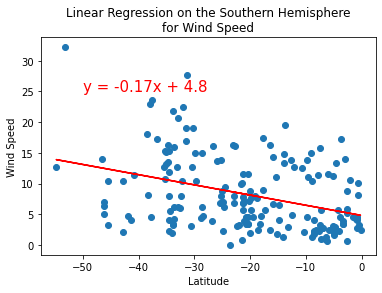

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,25))